# Projet 3: Concevez une application au service de la santé publique
- Notre mission est de **concevoir une application au service de la santé publique en lien avec l'alimentation**.
- Cet exercice est fait à partir de la base de données **OpenFoodFacts** qui fournit des information nutritionnelle.

- Ce dernier exercice consiste à analyser la nouvelle base de données **"Clean_Food_df"** précedemment nettoyée.

## 1. Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from matplotlib import rcParams
from statsmodels.formula.api import ols

# style
plt.style.use("ggplot")
#rcParams['figure.figsize'] = (12,  6)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


%matplotlib inline

## 2. Importattion des données

In [88]:
df_clean= pd.read_csv('Cleaned_Food_df.csv', sep='\t')
df_clean.head();

In [3]:
df_clean.shape

(28166, 18)

In [4]:
df_clean.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28166 entries, 0 to 28165
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     28166 non-null  int64  
 1   product_name             28166 non-null  object 
 2   image_url                28166 non-null  object 
 3   brands                   28166 non-null  object 
 4   additives_n              28166 non-null  float64
 5   nutrition_grade_fr       28166 non-null  object 
 6   pnns_groups_1            28166 non-null  object 
 7   pnns_groups_2            28166 non-null  object 
 8   main_category_fr         28166 non-null  object 
 9   energy_100g              28166 non-null  float64
 10  fat_100g                 28166 non-null  float64
 11  saturated-fat_100g       28166 non-null  float64
 12  carbohydrates_100g       28166 non-null  float64
 13  sugars_100g              28166 non-null  float64
 14  fiber_100g            

# 3. Analyse univariée

## 3.1. Variables catégorielles

In [5]:
df_clean.select_dtypes('object').nunique()

product_name          23611
image_url             28166
brands                 7025
nutrition_grade_fr        5
pnns_groups_1            12
pnns_groups_2            38
main_category_fr        129
dtype: int64

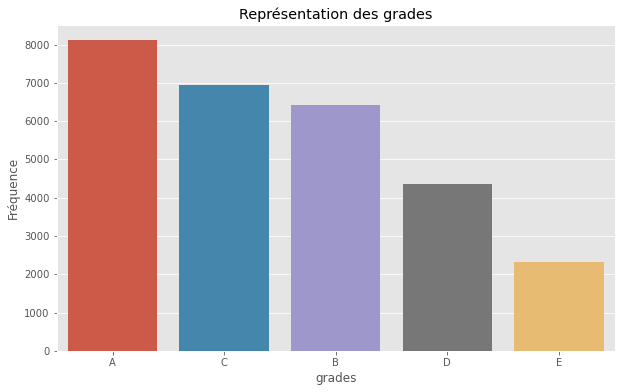

In [43]:
df_grades = df_clean["nutrition_grade_fr"].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x = df_grades.index,
           y = df_grades.values)
plt.xlabel('grades')
plt.ylabel('Fréquence')
plt.title('Représentation des grades')
plt.show()

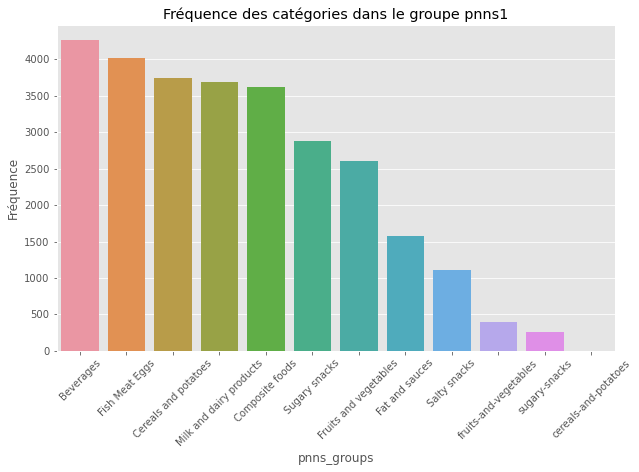

In [46]:
pnns1 = df_clean['pnns_groups_1'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x = pnns1.index,
           y = pnns1.values)
plt.xticks(rotation=45)
plt.xlabel('pnns_groups')
plt.ylabel('Fréquence')
plt.title('Fréquence des catégories dans le groupe pnns1')
plt.show()

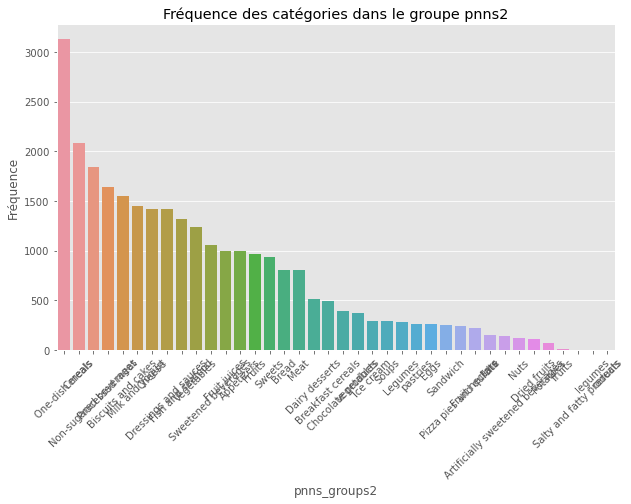

In [47]:
pnns2 = df_clean['pnns_groups_2'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x = pnns2.index,
           y = pnns2.values)
plt.xticks(rotation=45)
plt.xlabel('pnns_groups2')
plt.ylabel('Fréquence')
plt.title('Fréquence des catégories dans le groupe pnns2')
plt.show()

## 3.2. Variables numériques

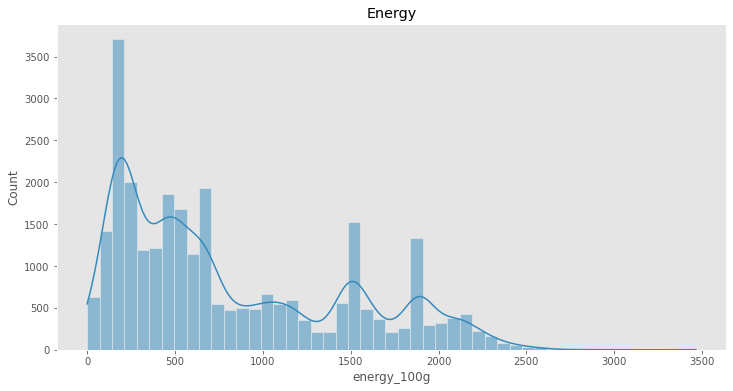

In [9]:
rcParams['figure.figsize'] = (12,  6)
sns.histplot(df_clean['energy_100g'], kde=True)
plt.grid(False)
plt.title("Energy")
plt.show()

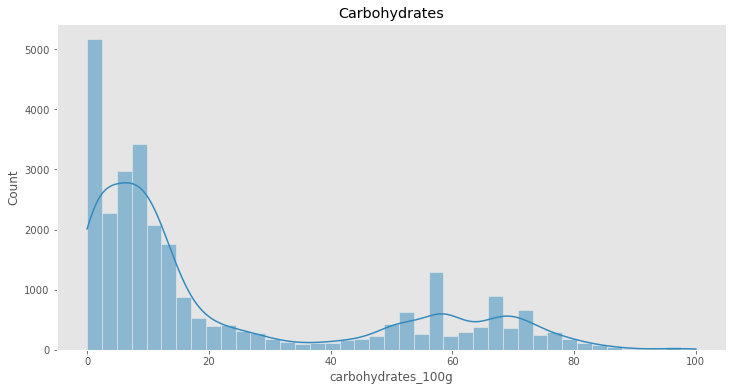

In [10]:
rcParams['figure.figsize'] = (12,  6)
sns.histplot(df_clean['carbohydrates_100g'], kde=True)
plt.grid(False)
plt.title("Carbohydrates")
plt.show()

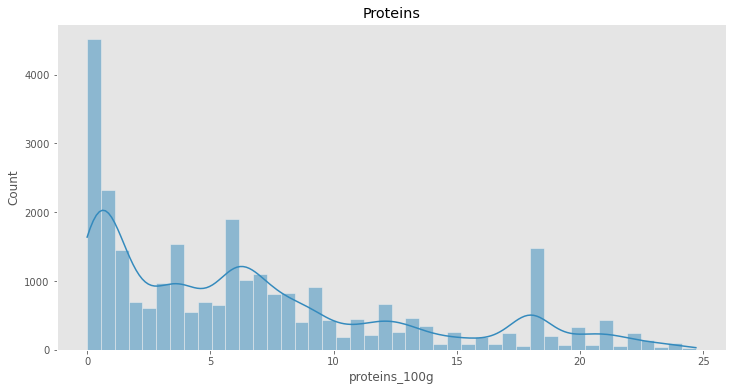

In [148]:
rcParams['figure.figsize'] = (12,  6)
sns.histplot(df_clean['proteins_100g'], kde=True)
plt.grid(False)
plt.title("Proteins")
plt.show()

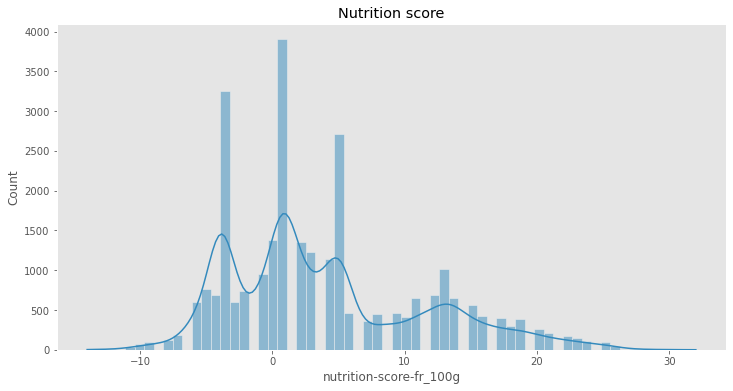

In [149]:
rcParams['figure.figsize'] = (12,  6)
sns.histplot(df_clean['nutrition-score-fr_100g'], kde=True)
plt.grid(False)
plt.title("Nutrition score")
plt.show()

- Toutes les courbes sont asymétriques, avec un skewness positif, indiquant une distribution étalée à droite.

# 4. Matrice de correlation

<AxesSubplot:>

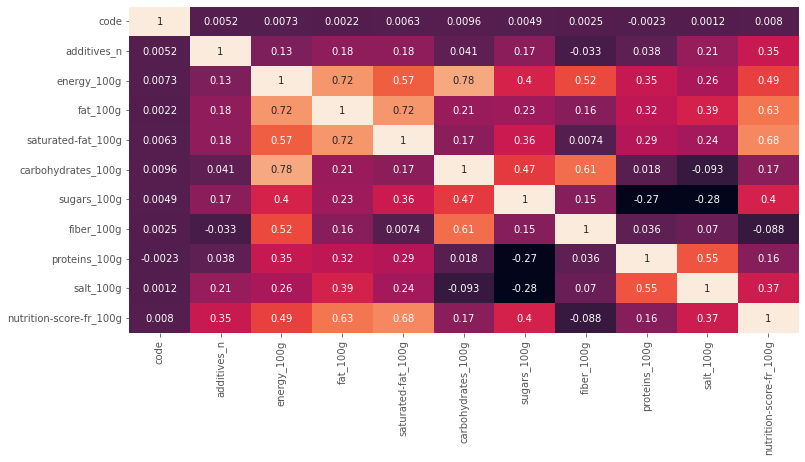

In [11]:
rcParams['figure.figsize'] = (12,  6)
sns.heatmap(df_clean.corr(),cbar=False, annot=True)

# 4. Analyse bivariée


- **Relation entre nutrition_grade et les variable quantitatives**

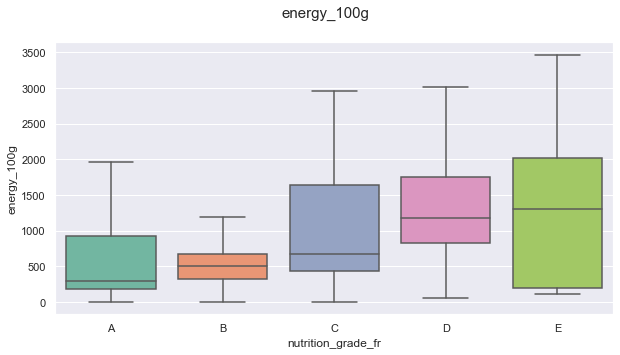

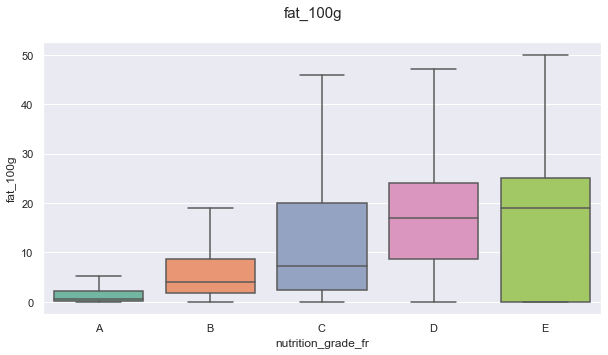

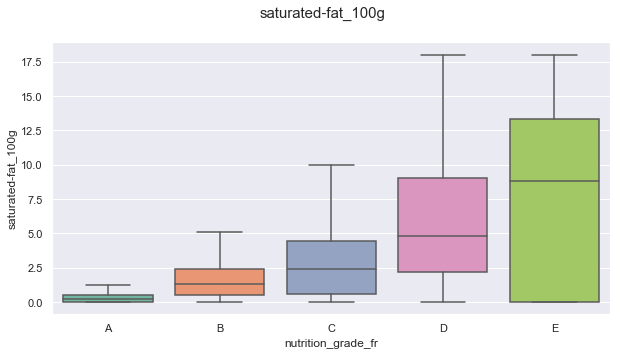

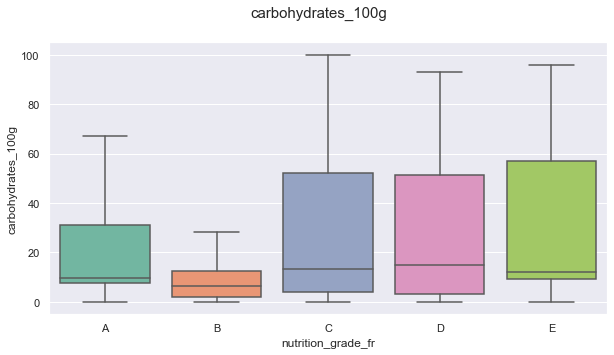

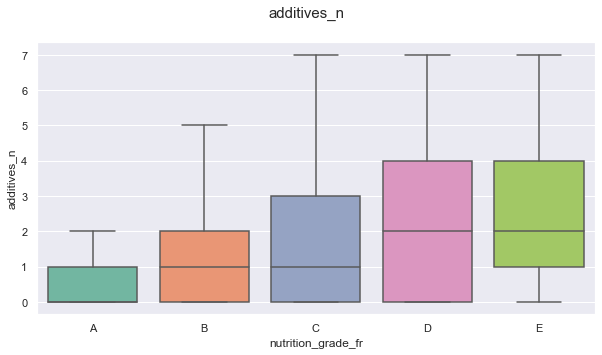

In [83]:
for nutriment in ['energy_100g','fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'additives_n']:
  fig = plt.figure(figsize=(10,5))
  fig.suptitle(nutriment, fontsize=15)

  chart = sns.boxplot(
      data=df_clean,
      x='nutrition_grade_fr',
      y=nutriment,
      palette='Set2',
      showfliers = False,
      order=df_clean.nutrition_grade_fr.sort_values().unique()
  )

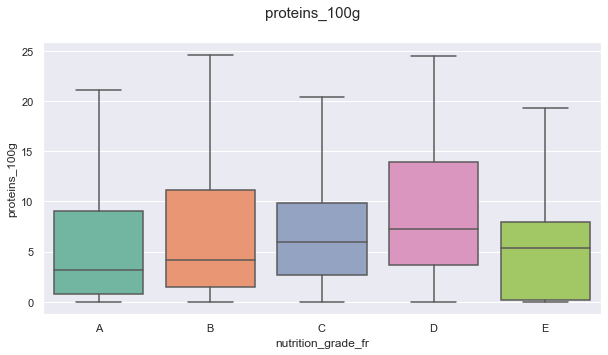

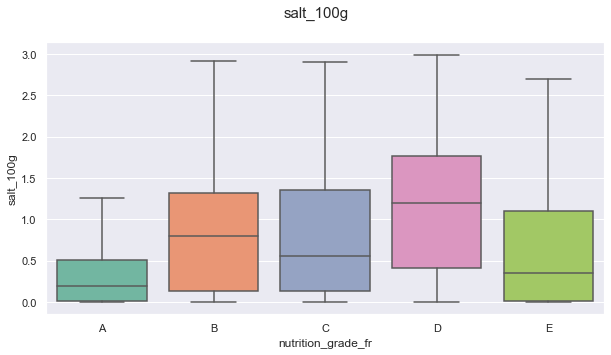

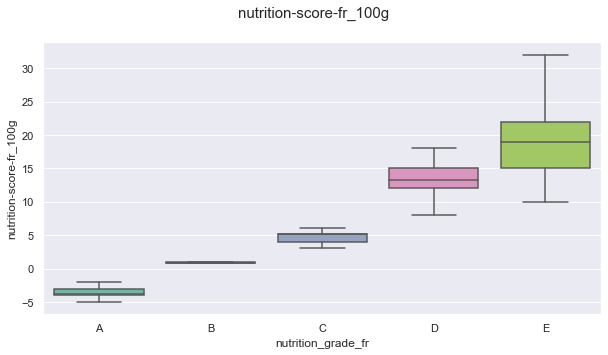

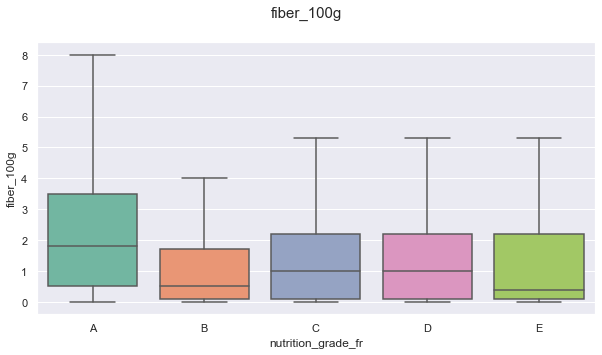

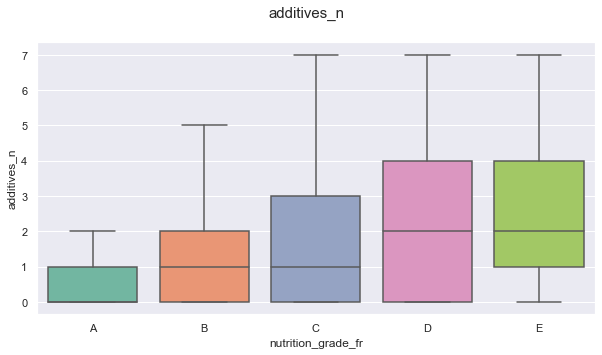

In [82]:
for nutriment in ['proteins_100g','salt_100g','nutrition-score-fr_100g', 'fiber_100g', 'additives_n']:
  fig = plt.figure(figsize=(10,5))
  fig.suptitle(nutriment, fontsize=15)

  chart = sns.boxplot(
      data=df_clean,
      x='nutrition_grade_fr',
      y=nutriment,
      palette='Set2',
      showfliers = False,
      order=df_clean.nutrition_grade_fr.sort_values().unique()
  )

- **Repartition des nutriments par rapport aux groupes de produits (pnns_group_1)**

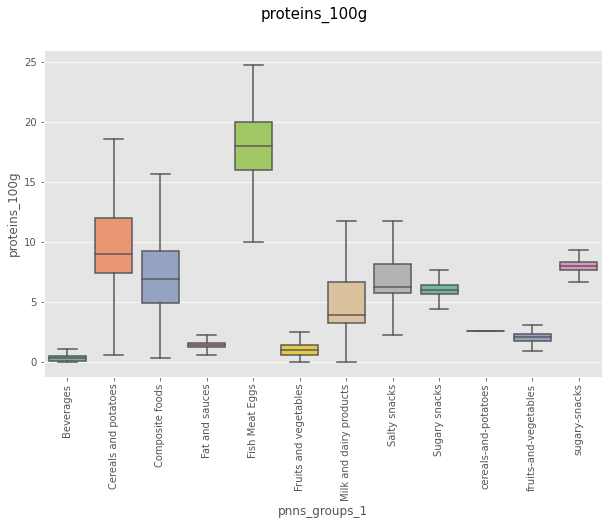

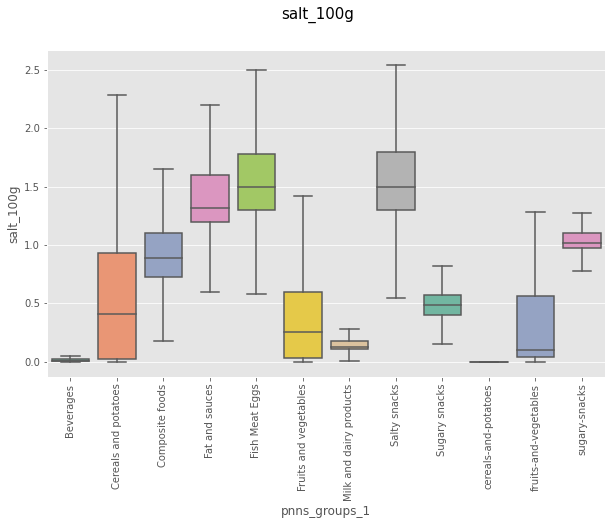

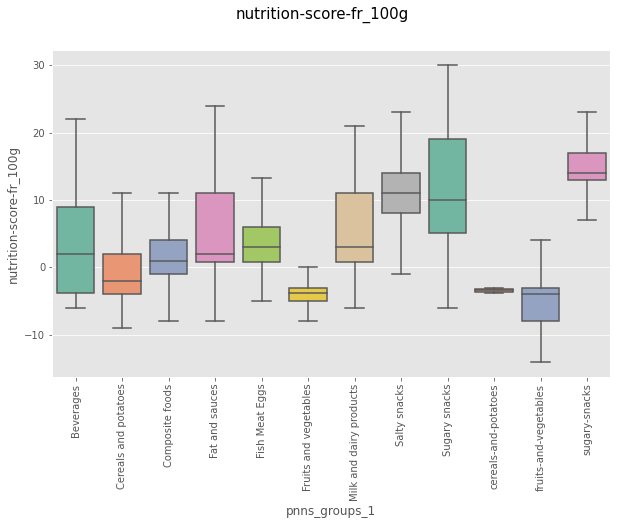

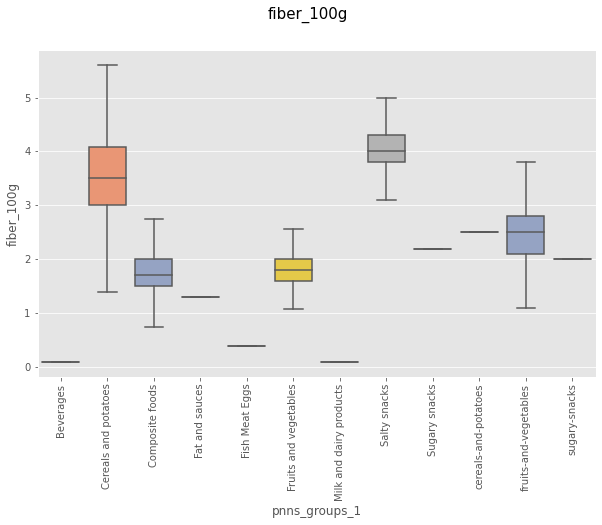

In [59]:
for nutriment in ['proteins_100g','salt_100g','nutrition-score-fr_100g', 'fiber_100g']:
  fig = plt.figure(figsize=(10,6))
  fig.suptitle(nutriment, fontsize=15)
  plt.xticks(rotation=90)

  chart = sns.boxplot(
      data=df_clean,
      x='pnns_groups_1',
      y=nutriment,
      palette='Set2',
      showfliers = False,
      order=df_clean.pnns_groups_1.sort_values().unique()
  )

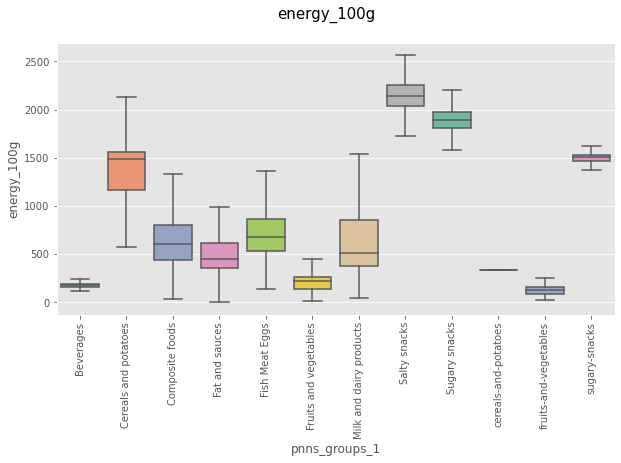

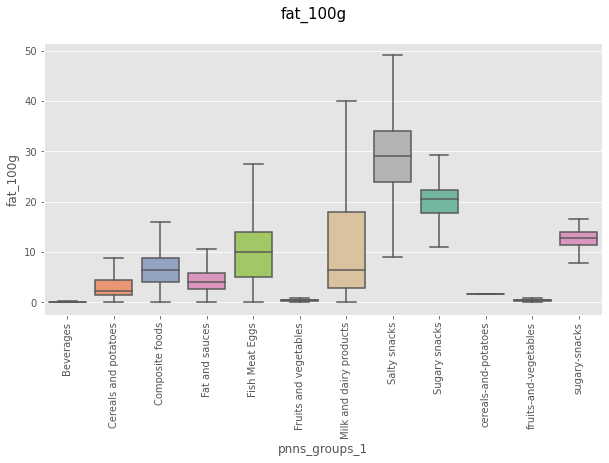

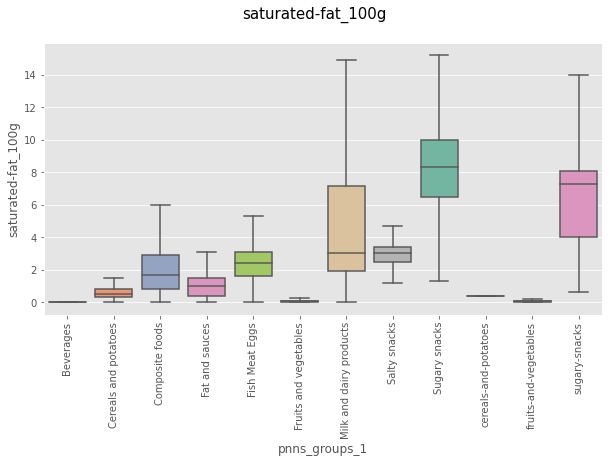

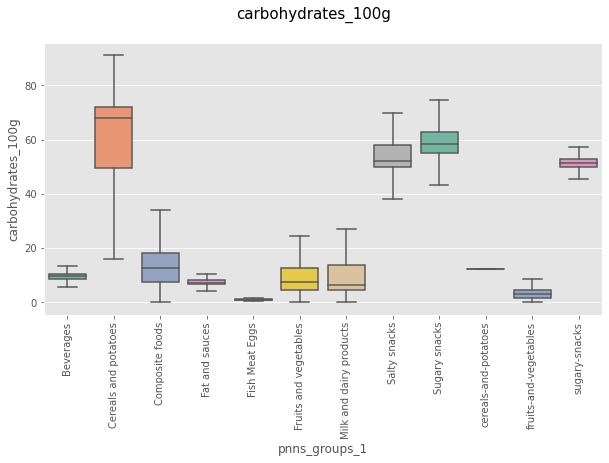

In [154]:
for nutriment in ['energy_100g','fat_100g', 'saturated-fat_100g', 'carbohydrates_100g']:
  fig = plt.figure(figsize=(10,5))
  fig.suptitle(nutriment, fontsize=15)
  plt.xticks(rotation=90)

  chart = sns.boxplot(
      data=df_clean,
      x='pnns_groups_1',
      y=nutriment,
      palette='Set2',
      showfliers = False,
      order=df_clean.pnns_groups_1.sort_values().unique()
  )

# 6. Analyse de la variance : ANOVA

ANOVA est une analyse de la variance qui permet de conclure à une difference ou non entre la variance de groupes. Dans  notre cas il s'agit de voir si la variance des nutriments est la meme pour tous les grades nutritionnels.
Nous avons donc les deux hypothèses suivantes:
- **Hypothèse nulle** : La variance des nutrimentsnts est la même pour touts les grades nutritionnels
- **Hypothèse alternative**: La variance des nutrimentsnts est différente à travers les grades nutritionnels

In [13]:
df_clean.columns;

In [14]:
newcol = ['code', 'product_name', 'image_url', 'brands', 'additives_n', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2',
          'main_category', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
          'salt_100g', 'nutrition_score_fr_100g']

In [15]:
df_clean2 = df_clean.copy()

In [16]:
df_clean2.columns = newcol

- <span style='background:aqua'>**"proteins_100g"**</span>

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('proteins_100g ~ nutrition_grade_fr', data=df_clean2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,4.824594e+04,4.0,323.998941,4.512499e-273
Residual,1.048347e+06,28161.0,NaN,NaN


- <span style='background:aqua'>**"energy_100g"**</span>

In [160]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('energy_100g ~ nutrition_grade_fr', data=df_clean2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,2.063948e+09,4.0,1500.20887,0.0
Residual,9.685792e+09,28161.0,NaN,NaN


- <span style='background:aqua'>**"fat_100g"**</span>

In [161]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('fat_100g ~ nutrition_grade_fr', data=df_clean2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,8.245489e+05,4.0,3233.009603,0.0
Residual,1.795550e+06,28161.0,NaN,NaN


- <span style='background:aqua'>**"saturated_fat_100g"**</span>

In [162]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('saturated_fat_100g ~ nutrition_grade_fr', data=df_clean2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,154614.818725,4.0,3769.032382,0.0
Residual,288808.072515,28161.0,NaN,NaN


- <span style='background:aqua'>**"carbohydrates_100g"**</span>

In [163]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('carbohydrates_100g ~ nutrition_grade_fr', data=df_clean2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,8.452521e+05,4.0,357.085487,1.914048e-300
Residual,1.666488e+07,28161.0,NaN,NaN


- <span style='background:aqua'>**"sugars_100g"**</span>

In [164]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('sugars_100g ~ nutrition_grade_fr', data=df_clean2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,4.277044e+05,4.0,1448.125557,0.0
Residual,2.079340e+06,28161.0,NaN,NaN


- <span style='background:aqua'>**"fiber_100g"**</span>

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('fiber_100g ~ nutrition_grade_fr', data=df_clean2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,4480.313130,4.0,466.302192,0.0
Residual,67643.954976,28161.0,NaN,NaN


- <span style='background:aqua'>**"salt_100g"**</span>

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('salt_100g ~ nutrition_grade_fr', data=df_clean2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,2163.097222,4.0,1466.582745,0.0
Residual,10383.829531,28161.0,NaN,NaN


- <span style='background:aqua'>**"nutrition_score_fr_100g"**</span>

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('nutrition_score_fr_100g ~ nutrition_grade_fr', data=df_clean2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,1.435617e+06,4.0,72837.247643,0.0
Residual,1.387629e+05,28161.0,NaN,NaN


- <span style='background:aqua'>**"additives_n"**</span>

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('additives_n ~ nutrition_grade_fr', data=df_clean2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,10993.426770,4.0,954.692866,0.0
Residual,81069.499453,28161.0,NaN,NaN


Au regards des resultats ci-dessous (**p-values < 0.005, dans tous les cas de figures**), 
- nous rejetons l'hypothèse null 
- concluon: différence statistiquement significative entre la variance des nutriments à travers les grades nutritionnels.


# 6. Analyse des composantes principales (ACP)


L'analyse en composantes principales (ACP) vise à réduire la dimensionnalité de l'ensemble des données
Ceci crée un ensemble restreint de caractéristiques qui contient toutes les informations nécessaires pour prédire les variables cibles de manière plus efficace et plus précise.

- 1. Selection des colonnes pour l'ACP (nombre de composantes - features à redimentionner)
- 2. CNormalisation - Mise à l'échelle
- 3. Calcul des composantes principales (avec PCA de sklearn)
- 4. Transformer la matrice obtenue en DataFrame
- 5. Graphique pour afficher les nb de composantes qui expliquent au moins 95% de variance cumulée.

In [63]:
df_clean_final = df_clean2.copy()

- <span style='background:aqua'>**Selection des colonnes pour l'ACP**</span>

In [89]:
num_cols = df_clean_final.select_dtypes('float').columns.to_list() #nunique()
num_cols;

- <span style='background:aqua'>**Nombre de composantes**</span>

In [65]:
n_comp = len(num_cols)

- <span style='background:aqua'>**Données ACP**</span>

In [66]:
df_acp = df_clean_final[num_cols]

- <span style='background:aqua'>**Noms à afficher**</span>

In [67]:
#names =  df_clean_final['product_name']
features = df_acp.columns
X = df_acp.values

In [90]:
features;

- <span style='background:aqua'>**Mise à l'échelle**</span>

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
data_scaled =scaler.fit_transform(X)

In [91]:
data_scaled;

- <span style='background:aqua'>**Calcul de l'ACP**</span>

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=n_comp)
pca.fit_transform(data_scaled);


- <span style='background:aqua'>**Obtenir une DataFrame**</span>

In [72]:
df_acp_final = pd.DataFrame(pca.components_,
                      index=['PC'+str(i+1) for i in range(n_comp)],
                      columns=num_cols).T
df_acp_final

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
additives_n,0.161530,-0.121398,0.291167,0.858448,-0.176782,-0.322584,-0.020023,-0.009948,-0.039636,0.008693
energy_100g,0.465748,0.173712,-0.202833,-0.052277,-0.094311,-0.051062,-0.303312,-0.138438,-0.064689,0.763007
fat_100g,0.431420,-0.152806,0.035870,-0.205866,0.293631,-0.400930,-0.168489,-0.557202,0.125760,-0.381074
saturated_fat_100g,0.402246,-0.143032,0.228905,-0.309218,-0.036302,-0.319678,0.298830,0.514164,-0.460291,-0.026132
carbohydrates_100g,0.289755,0.479535,-0.218933,0.105021,-0.239788,0.215683,-0.414742,0.173545,-0.252723,-0.507062
sugars_100g,0.239450,0.393311,0.413597,-0.030949,-0.193916,0.352919,0.531685,-0.412366,-0.032070,0.005588
fiber_100g,0.183549,0.377248,-0.472117,0.219552,0.401740,-0.185351,0.470437,0.211718,0.301003,-0.020194
proteins_100g,0.199027,-0.380676,-0.417510,-0.066754,-0.684960,0.009355,0.247081,-0.037654,0.301975,-0.117430
salt_100g,0.213961,-0.457918,-0.285377,0.240099,0.343265,0.520708,0.129215,-0.133017,-0.426361,-0.017404
nutrition_score_fr_100g,0.385599,-0.172374,0.350361,-0.006547,0.169759,0.392101,-0.190149,0.376560,0.581454,-0.014187


- <span style='background:aqua'>**Combien de composantes expliquent au moins 95% de la variance**</span> 

In [73]:
# quel est le pourcentage de variance préservée par chacune de
# nos composantes?
variances = pca.explained_variance_ratio_
variances

array([0.37722559, 0.20349768, 0.15141981, 0.09242713, 0.05325772,
       0.04323493, 0.03259729, 0.02516238, 0.01876793, 0.00240953])

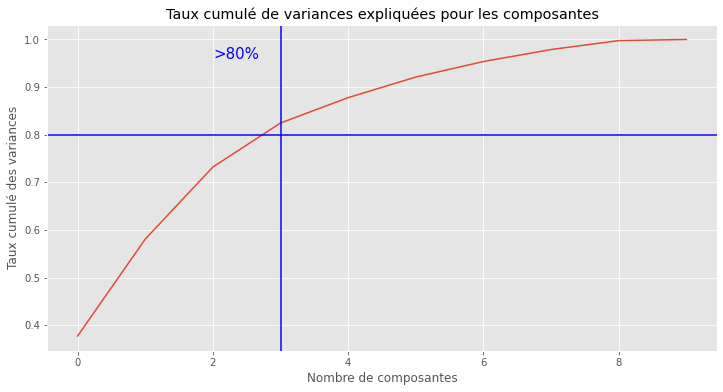

In [74]:
# Somme cumulée de chacune de ces variances?
meilleur_dims = np.cumsum(variances)

#  on va trouver le moment où on attient 80% 
plt.plot(meilleur_dims)
# argmax pour > 80 %
best = np.argmax(meilleur_dims > 0.80)
plt.axhline(y=0.80, color='b')
plt.text(2, 0.96, '>80%', color='b', fontsize=15)
plt.axvline(x=best, color='b')
plt.title('Taux cumulé de variances expliquées pour les composantes')
plt.xlabel('Nombre de composantes')
plt.ylabel('Taux cumulé des variances')
plt.show()

In [75]:
def display_circles(
        pcomp,
        n_comp,
        pca,
        axis_ranks,
        labels=None,
        label_rotation=0,
        lims=None,
        width=16,
        n_cols=3):
    """
    Affiche le cercle des corrélations
    Parameters
    ----------
    pcs :
    n_comp :
    pca :
    axis_ranks :
    labels : , optional
            None par défaut.
    label_rotation :, optional
                    0 par défaut.
    lims : , optional
            None par défaut.
    Returns
    -------
    None.
    """
    n_rows = (n_comp + 1) // n_cols
    fig = plt.figure(figsize=(width, n_rows * width / n_cols))
    # boucle sur les plans factoriels (3 premiers plans -> 6 composantes)
    for i, (d1, d2) in enumerate(axis_ranks):
        if d2 < n_comp:
            ax = fig.add_subplot(n_rows, n_cols, i + 1)
            # limites
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcomp.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcomp[d1, :]), max(
                    pcomp[d1, :]), min(pcomp[d2, :]), max(pcomp[d2, :])
            # flèches, si plus de 30, pas de pointes
            if pcomp.shape[1] < 30:
                plt.quiver(np.zeros(pcomp.shape[1]),
                           np.zeros(pcomp.shape[1]),
                           pcomp[d1,
                               :],
                           pcomp[d2,
                               :],
                           angles='xy',
                           scale_units='xy',
                           scale=1,
                           color='black')
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcomp[[d1, d2]].T]
                ax.add_collection(
                    LineCollection(
                        lines,
                        alpha=.1,
                        color='black'))
            # noms de variables
            if labels is not None:
                for text, (x, y) in enumerate(pcomp[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        ax.text(
                            x,
                            y,
                            labels[text],
                            fontsize='12',
                            ha='center',
                            va='center',
                            rotation=label_rotation,
                            color="red",
                            alpha=0.5)
            # cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='k')
            ax.add_artist(circle)
            # définition des limites du graphique
            ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
            # affichage des lignes horizontales et verticales
            ax.plot([-1, 1], [0, 0], color='black', ls='--')
            ax.plot([0, 0], [-1, 1], color='black', ls='--')
            # nom des axes, avec le pourcentage d'inertie expliqué
            ax.set_xlabel(
                'PC{} ({}%)'.format(
                    d1 +
                    1,
                    round(
                        100 *
                        pca.explained_variance_ratio_[d1],
                        1)))
            ax.set_ylabel(
                'PC{} ({}%)'.format(
                    d2 +
                    1,
                    round(
                        100 *
                        pca.explained_variance_ratio_[d2],
                        1)))
            ax.set_title(
                'Cercle de corrélation ACP (PC{} and PC{})'.format(
                    d1 + 1, d2 + 1))
    plt.axis('square')
    plt.grid(False)
    plt.tight_layout()
    plt.show()


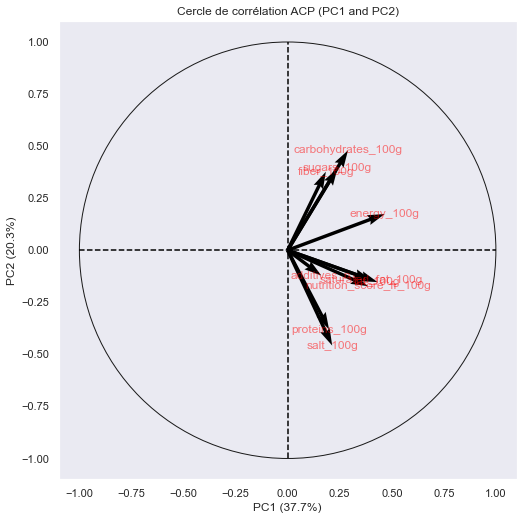

In [87]:
# Lee cercles des corrélations
pcomp = pca.components_
display_circles(pcomp, n_comp, pca, [(0, 1)], labels=np.array(
    features), label_rotation=0, lims=None, width=7, n_cols=1)

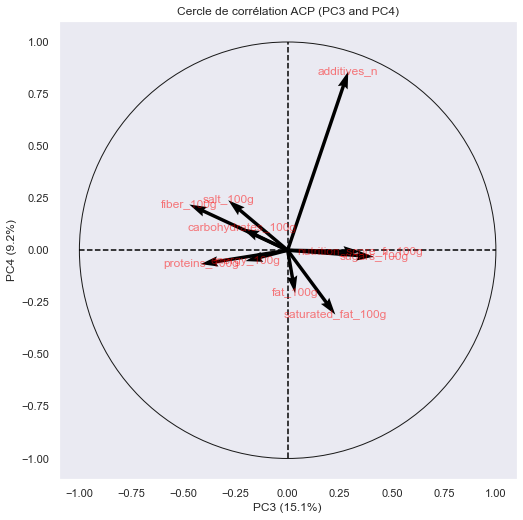

In [86]:
# Lee cercles des corrélations
pcomp = pca.components_
display_circles(pcomp, n_comp, pca, [(2, 3)], labels=np.array(
    features), label_rotation=0, lims=None, width=7, n_cols=1)

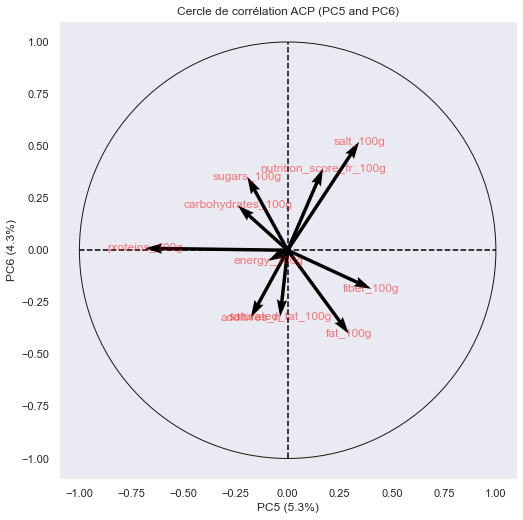

In [85]:
# Lee cercles des corrélations
pcomp = pca.components_
display_circles(pcomp, n_comp, pca, [(4, 5)], labels=np.array(
    features), label_rotation=0, lims=None, width=7, n_cols=1)

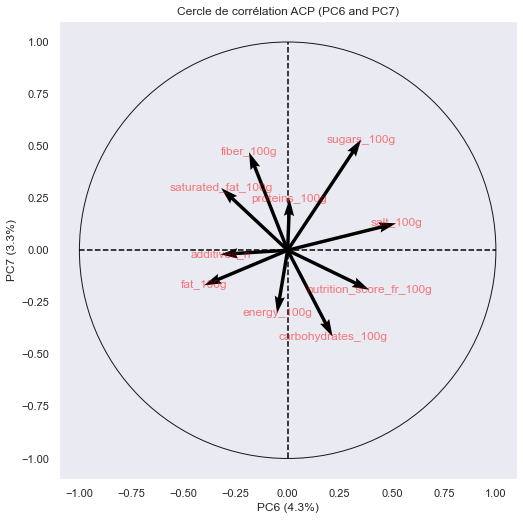

In [84]:
# Lee cercles des corrélations
pcomp = pca.components_
display_circles(pcomp, n_comp, pca, [(5, 6)], labels=np.array(
    features), label_rotation=0, lims=None, width=7, n_cols=1)

## Representation graphique en 2D et 3D

In [53]:
scaled_df = pd.DataFrame(data_scaled, columns=features)

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(data = pca , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])
pca_df;

- Joindre les les données PCA et la variable target (y)

In [55]:
y = df_clean["nutrition_grade_fr"]
y;

In [56]:
pca_final = pd.concat([pca_df, y], axis=1)
pca_final.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,nutrition_grade_fr
0,0.078564,1.838324,-2.164880,-0.076789,-0.545616,0.002371,-0.591356,0.332799,-0.241940,0.071252,A
1,3.052336,1.706107,0.927991,0.063383,-0.612427,-0.367022,0.398612,-0.768301,-0.752751,0.040973,C
2,-2.336939,0.665739,0.734356,-0.665552,-0.080214,0.026011,-0.094757,-0.305766,-0.318424,0.018987,A
3,-1.265142,0.197515,1.944996,0.262774,0.087644,0.633461,-0.513885,0.460649,0.892825,-0.012770,E
4,-1.140411,0.102760,2.044647,0.778157,0.053335,0.501650,-0.481119,0.453510,0.842057,-0.011169,E


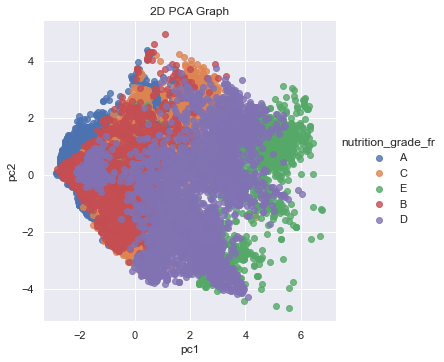

In [246]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
sns.lmplot(
    x='pc1', 
    y='pc2', 
    data=pca_final, 
    hue='nutrition_grade_fr', 
    fit_reg=False, 
    legend=True
    )
plt.title('2D PCA Graph')
plt.show()

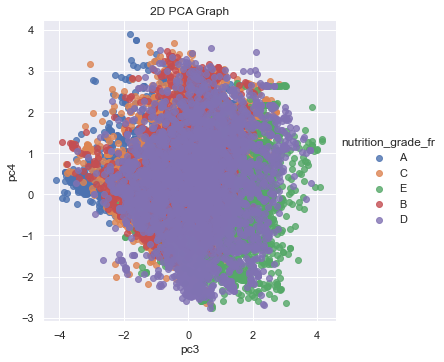

In [264]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
sns.lmplot(
    x='pc3', 
    y='pc4', 
    data=pca_final, 
    hue='nutrition_grade_fr', 
    fit_reg=False, 
    legend=True
    )
plt.title('2D PCA Graph')
plt.show()

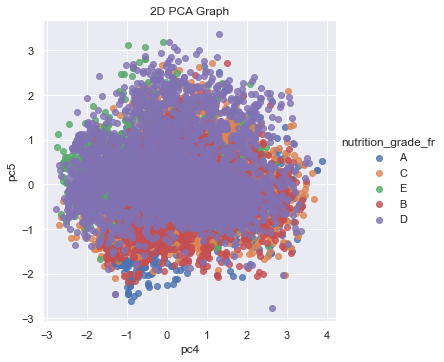

In [80]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
sns.lmplot(
    x='pc4', 
    y='pc5', 
    data=pca_final, 
    hue='nutrition_grade_fr', 
    fit_reg=False, 
    legend=True
    )
plt.title('2D PCA Graph')
plt.show()

## Conclusion
Notre jeu de données contient toutes les données nécessaires à notre idée d'application de vérification pour les personnes atteintes de L’Ostéoporose.

    - proteins_100g,
    - fiber_100g,
    - sugar_100g,
    - salt_100g,
    - energy_100g,
    - nutrition_score_fr,
    - nutrition_grade_fr.

- En effet ces personnes doivent suivre un régime alimentaire en évitant certains aliments notamment le sel, le sucre etc tout en privilégiant les bibres et les protéines issues des cereales et legumes.

- L'application vérifie  de la compatibilité d'un produit pour personnes atteintes de l'Ostéoporose. Elle recommandera ensuite trois produits similaires.